# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

C:\Users\roman\AppData\Local\Temp\ipykernel_564\3984682245.py:74: RuntimeWarning: overflow encountered in ubyte_scalars
  fAxy = (img[x2, y2] - img[x0, y1] - img[x1, y0] - fA) / 4
C:\Users\roman\AppData\Local\Temp\ipykernel_564\3984682245.py:78: RuntimeWarning: overflow encountered in ubyte_scalars
  fBxy = (img[x2, y3] - img[x0, y2] - img[x1, y1] - fB) / 4
C:\Users\roman\AppData\Local\Temp\ipykernel_564\3984682245.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  fCx = (img[x3, y2] - img[x1, y2]) / 2
C:\Users\roman\AppData\Local\Temp\ipykernel_564\3984682245.py:81: RuntimeWarning: overflow encountered in ubyte_scalars
  fCy = (img[x2, y3] - img[x2, y1]) / 2
C:\Users\roman\AppData\Local\Temp\ipykernel_564\3984682245.py:82: RuntimeWarning: overflow encountered in ubyte_scalars
  fCxy = (img[x3, y3] - img[x1, y2] - img[x2, y1] - fC) / 4
C:\Users\roman\AppData\Local\Temp\ipykernel_564\3984682245.py:84: RuntimeWarning: overflow encountered in ubyte_scalars
  fDx = (img[x3, y1]

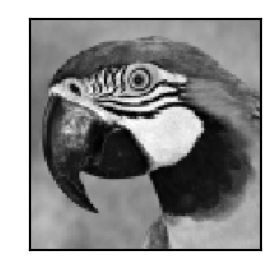

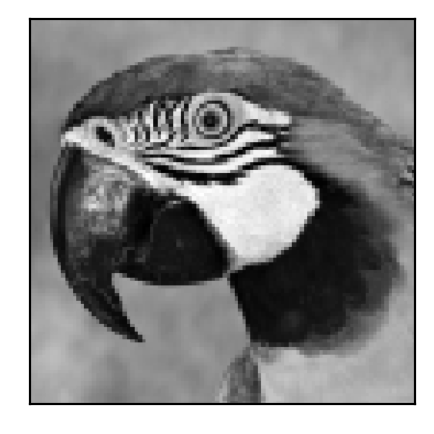

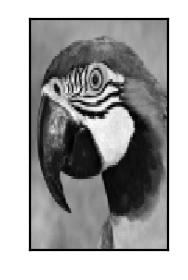

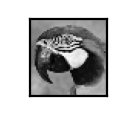

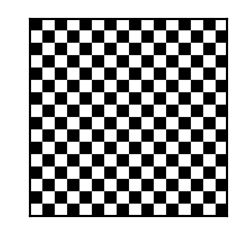

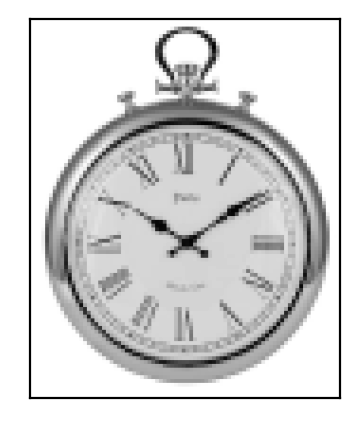

In [2]:
#TODO Do samodzielnej implementacji
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

parrot = cv2.imread('parrot.bmp')           # Read image
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY) # Convert
clock = cv2.imread('clock.bmp')           # Read image
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY) # Convert
chessboard = cv2.imread('chessboard.bmp')           # Read image
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY) # Convert to RGB
lena = cv2.imread('lena.bmp')           # Read image
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # Convert to RGB
firetruck = cv2.imread('firetruck.jpg')           # Read image
firetruck = cv2.cvtColor(firetruck, cv2.COLOR_BGR2GRAY)

a_invert = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [-3, 3, 0, 0, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [2, -2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, -3, 3, 0, 0, -2, -1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 2, -2, 0, 0, 1, 1, 0, 0],
                     [-3, 0, 3, 0, 0, 0, 0, 0, -2, 0, -1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, -3, 0, 3, 0, 0, 0, 0, 0, -2, 0, -1, 0],
                     [9, -9, -9, 9, 6, 3, -6, -3, 6, -6, 3, -3, 4, 2, 2, 1],
                     [-6, 6, 6, -6, -3, -3, 3, 3, -4, 4, -2, 2, -2, -2, -1, -1],
                     [2, 0, -2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 2, 0, -2, 0, 0, 0, 0, 0, 1, 0, 1, 0],
                     [-6, 6, 6, -6, -4, -2, 4, 2, -3, 3, -3, 3, -2, -1, -2, -1],
                     [4, -4, -4, 4, 2, 2, -2, -2, 2, -2, 2, -2, 1, 1, 1, 1]])


def cubic_interpolation(img: np.ndarray, w_factor: float, h_factor: float) -> np.ndarray:
    h, w = img.shape
    h_wy, w_wy = int(h * h_factor), int(w * w_factor)

    new_img = np.zeros((h_wy, w_wy))
    for i in range(h_wy):
        for j in range(w_wy):
            x1, y1 = int(i / h_factor), int(j / w_factor)

            if x1 < h and y1 < w:
                fA = img[x1, y1]

                x0 = x1 - 1
                x2 = x1 + 1
                x3 = x1 + 2
                y0 = y1 - 1
                y2 = y1 + 1
                y3 = y1 + 2

                if x3 >= h:
                    x3 = x1 - 2
                if x2 >= h:
                    x2 = x1 - 1
                if x0 < 0:
                    x0 = x1 + 1
                if y3 >= w:
                    y3 = y1 - 2
                if y2 >= w:
                    y2 = y1 - 1
                if y0 < 0:
                    y0 = y1 + 1

                fB = img[x1, y2]
                fC = img[x2, y2]
                fD = img[x2, y1]

                fAx = (img[x2, y1] - img[x0, y1]) / 2
                fAy = (img[x1, y2] - img[x1, y0]) / 2
                fAxy = (img[x2, y2] - img[x0, y1] - img[x1, y0] - fA) / 4

                fBx = (img[x2, y2] - img[x0, y2]) / 2
                fBy = (img[x1, y3] - img[x1, y1]) / 2
                fBxy = (img[x2, y3] - img[x0, y2] - img[x1, y1] - fB) / 4

                fCx = (img[x3, y2] - img[x1, y2]) / 2
                fCy = (img[x2, y3] - img[x2, y1]) / 2
                fCxy = (img[x3, y3] - img[x1, y2] - img[x2, y1] - fC) / 4

                fDx = (img[x3, y1] - img[x1, y1]) / 2
                fDy = (img[x2, y2] - img[x2, y0]) / 2
                fDxy = (img[x3, y2] - img[x1, y1] - img[x2, y0] - fD) / 4

                x = np.array([fA, fB, fC, fD, fAx, fBx, fCx, fDx, fAy, fBy, fCy, fDy, fAxy, fBxy, fCxy, fDxy]).T

                a = a_invert @ x
                a = np.reshape(a, (4, 4)).T
                I = sum([a[k, l] for l in range(4) for k in range(4)])

                new_img[i, j] = I.astype(np.uint8)

    return new_img


def display_cubic(img, w_factor, h_factor, dpi=200):
    img = cubic_interpolation(img, w_factor, h_factor)
    plt.figure(figsize=(img.shape[0] / 100, img.shape[1] / 100), dpi=200)
    plt.imshow(img, cmap="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()


display_cubic(parrot, 1.5, 1.5)
display_cubic(parrot, 2.5, 2.5)
display_cubic(parrot, 1.5, 2.5)
display_cubic(parrot, 0.5, 0.5)
display_cubic(chessboard, 8, 8)
display_cubic(clock, 3, 3)